# IBM Business Case: People Analitics

In [419]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import recall_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import seaborn as sns

In [420]:
ibm_people = pd.read_csv('IBM_people_dataset.csv')
ibm_people.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [421]:
ibm_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [422]:
ibm_people.Attrition = ibm_people.Attrition.astype('category').cat.reorder_categories(['Yes', 'No']).cat.codes

In [423]:
ibm_people.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,1,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,0,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,1,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,1,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Churn Calculation

In [424]:
ibm_people.Attrition.value_counts()

1    1233
0     237
Name: Attrition, dtype: int64

In [425]:
100 * ibm_people.Attrition.value_counts()/len(ibm_people)

1    83.877551
0    16.122449
Name: Attrition, dtype: float64

# Descriptive Analytics

/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


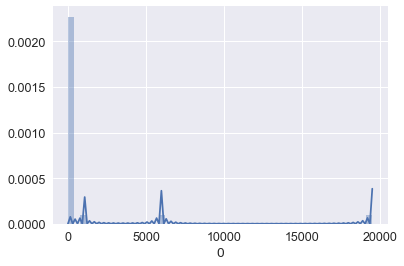

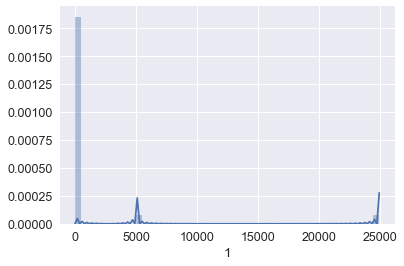

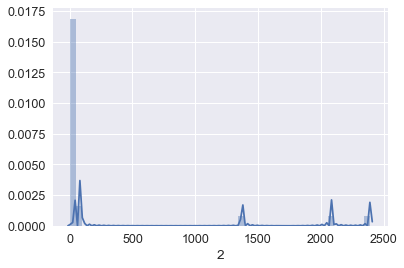

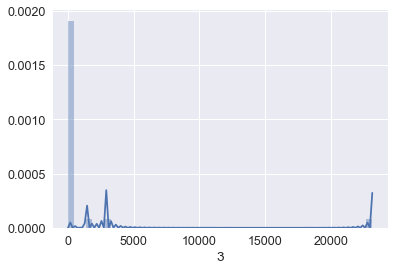

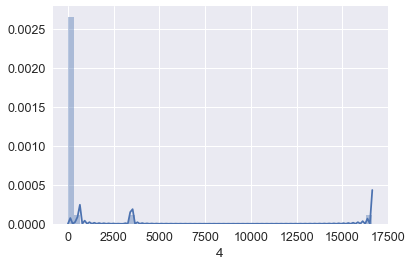

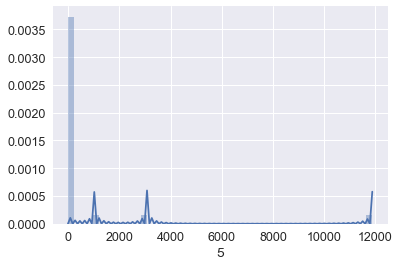

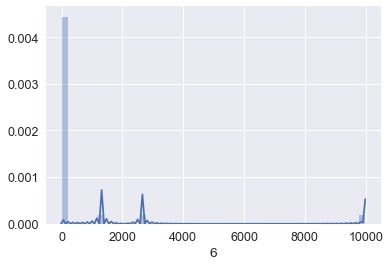

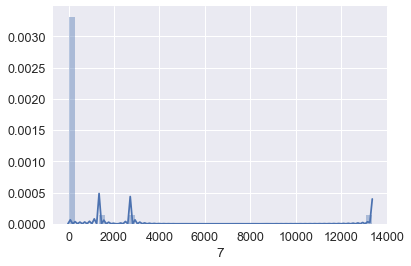

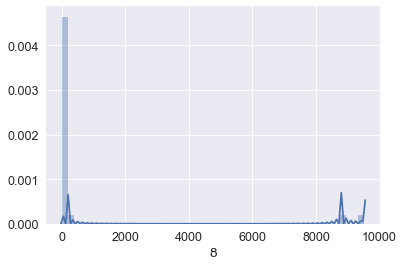

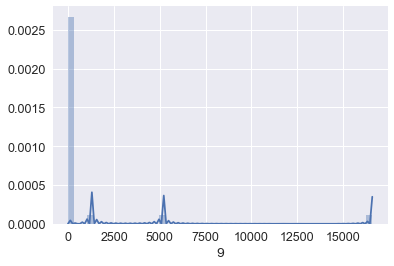

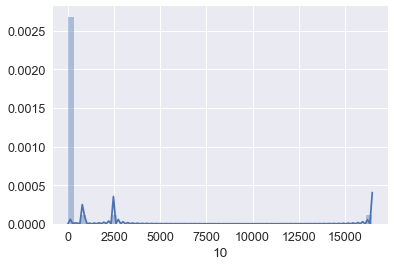

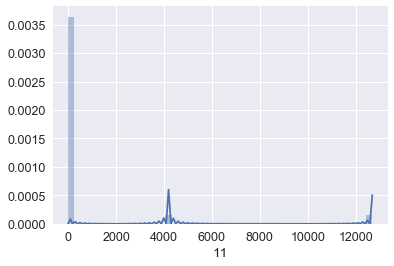

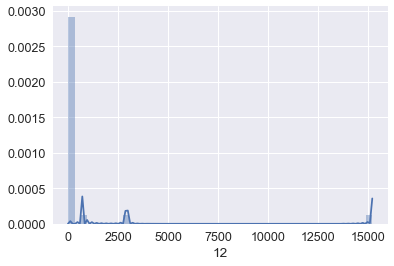

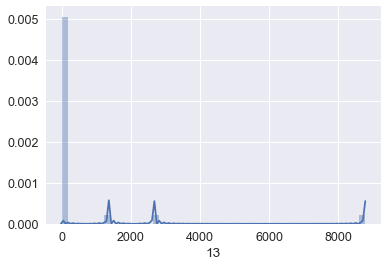

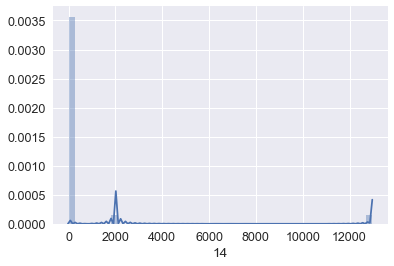

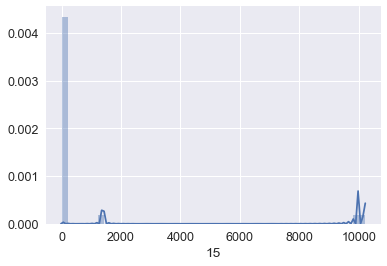

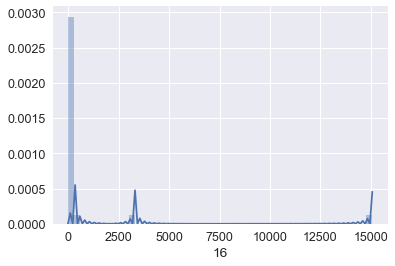

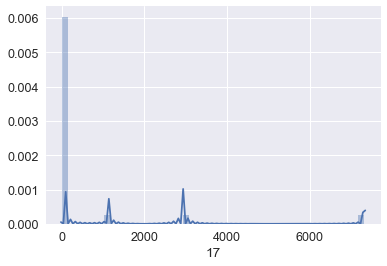

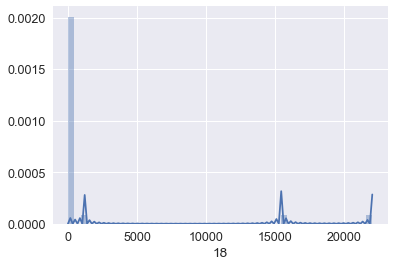

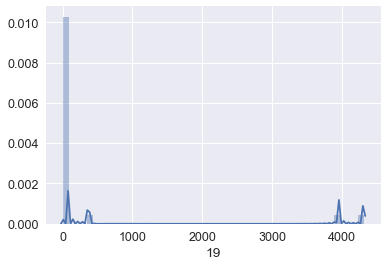

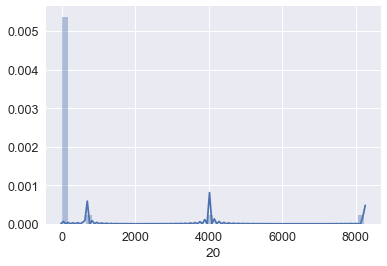

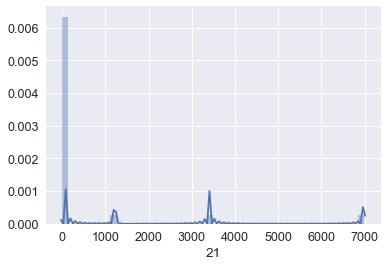

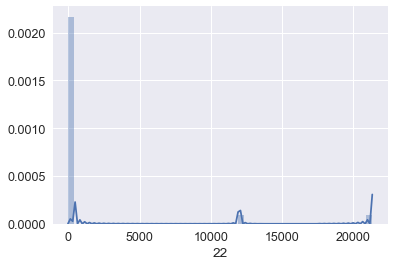

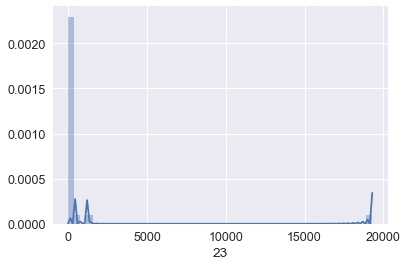

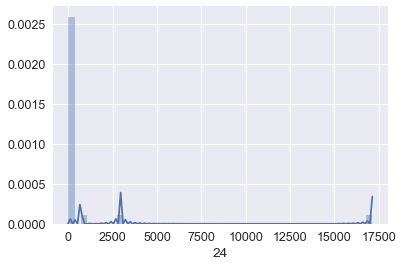

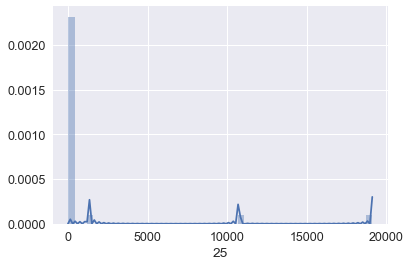

In [426]:
explore = ibm_people.select_dtypes([np.int, np.float])

for i, col in enumerate(explore.columns):
    plt.figure(i)
    sns.distplot(explore.loc[i])
plt.show()
# The rate is almost equally distributed between 100-1400
# Right skewed, the majority in 1-3, the other considerable portion in 8-10
# The highest number of people have worked in one company 
# Is right skewed, the majority have been between 0 to 2 years. Some spike also exists in around 7 years


In [427]:
ibm_people = ibm_people.drop("StandardHours", axis = 1)
ibm_people = ibm_people.drop("EmployeeCount", axis = 1)

/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


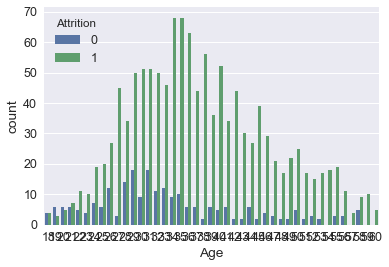

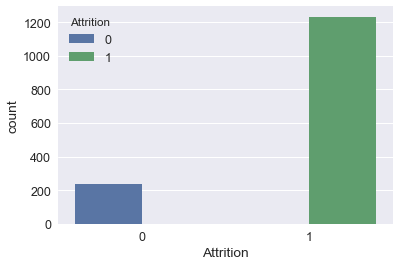

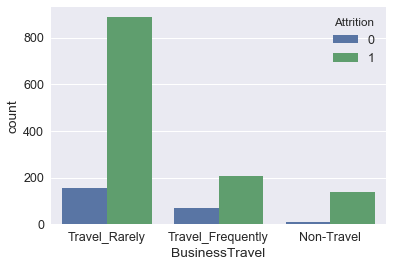

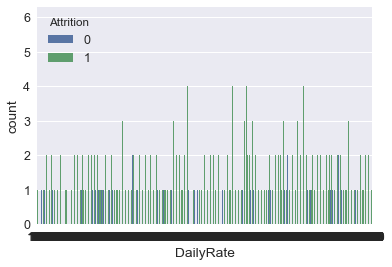

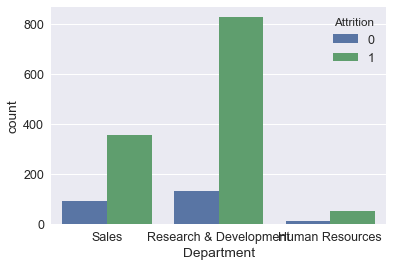

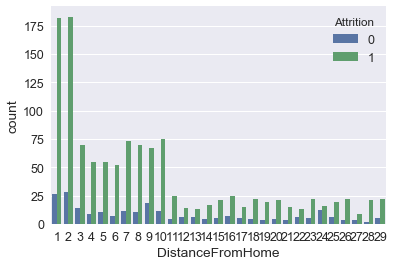

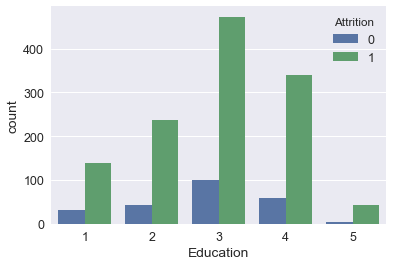

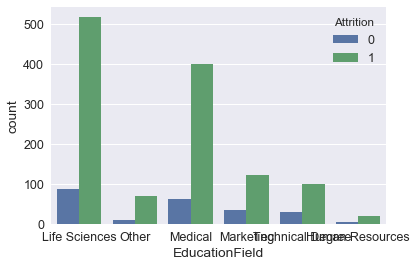

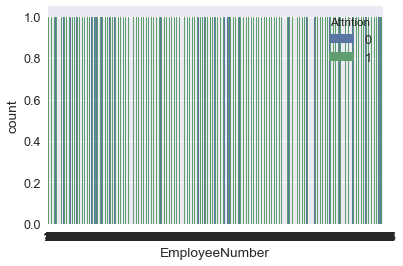

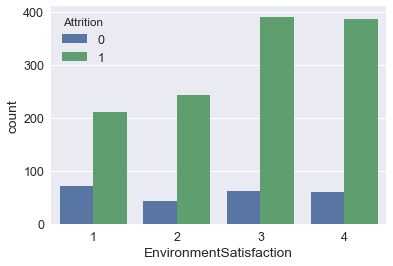

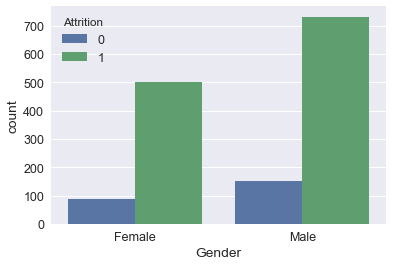

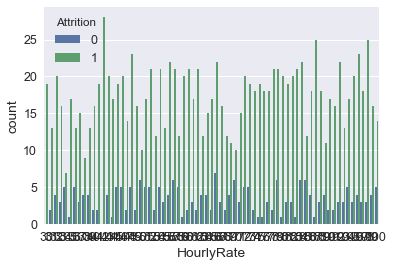

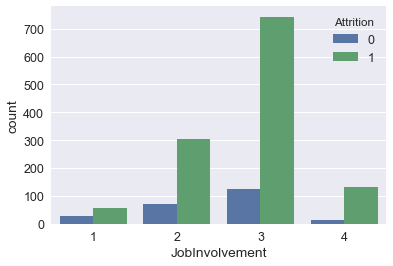

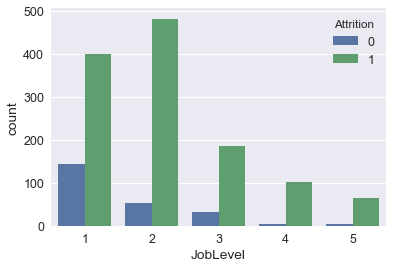

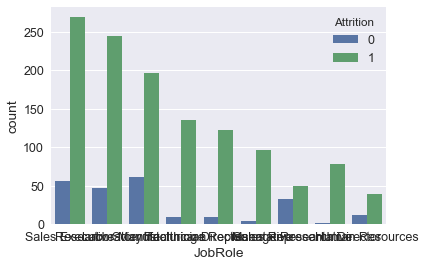

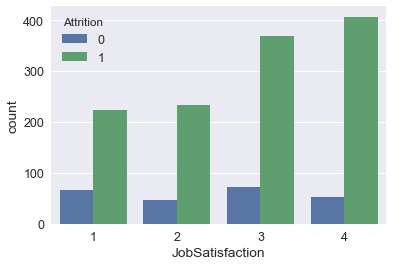

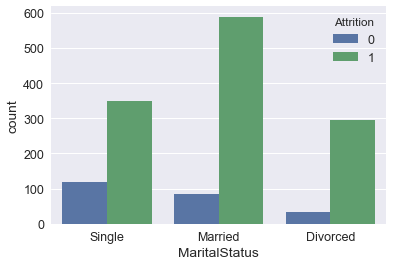

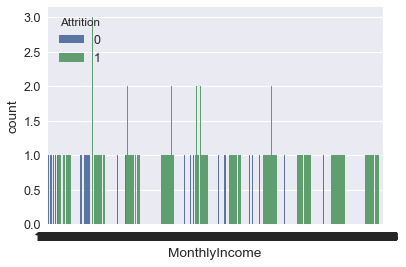

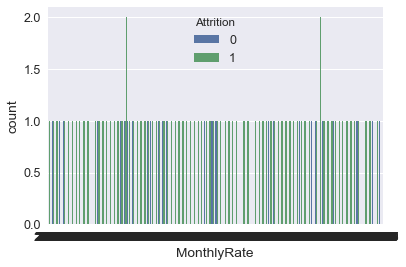

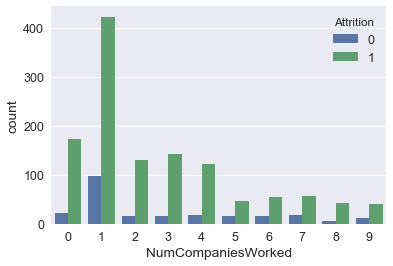

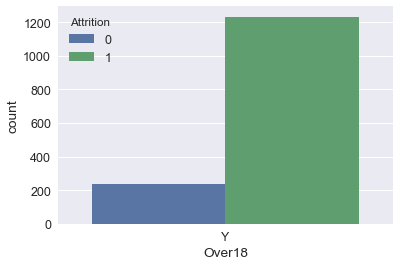

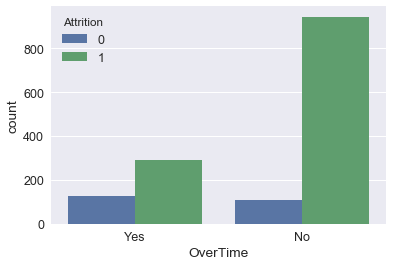

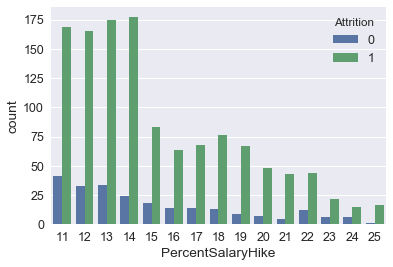

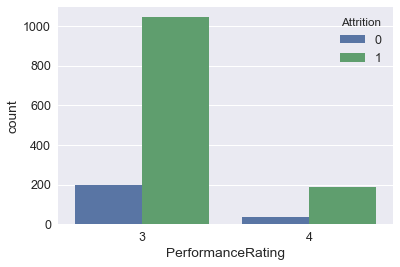

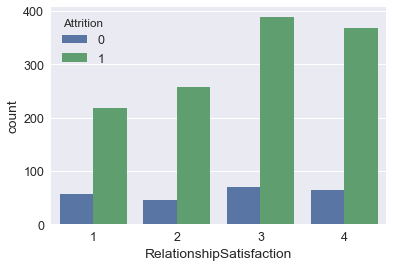

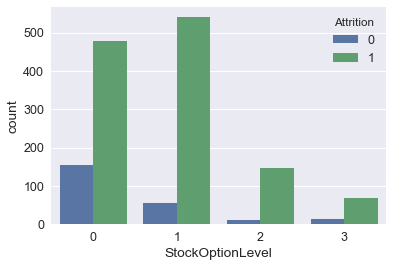

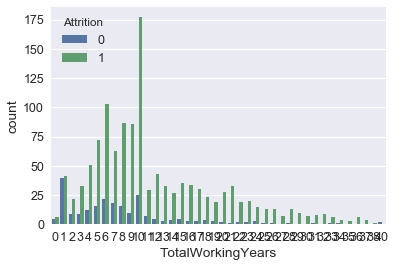

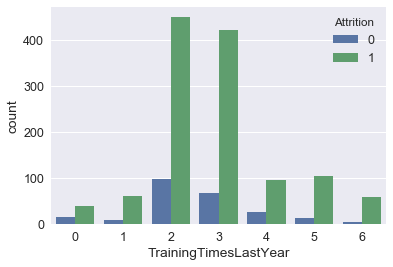

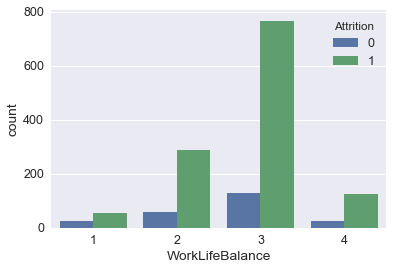

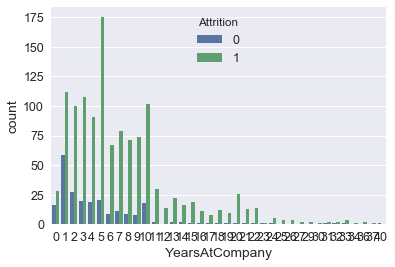

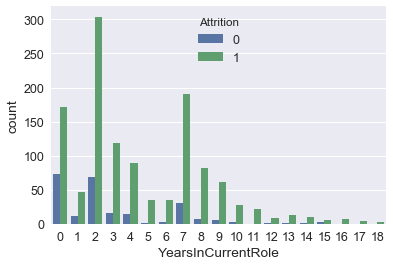

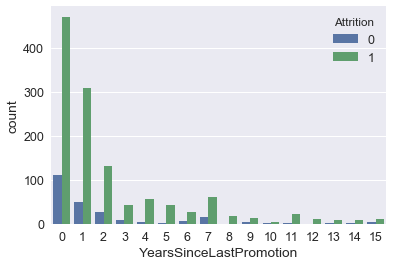

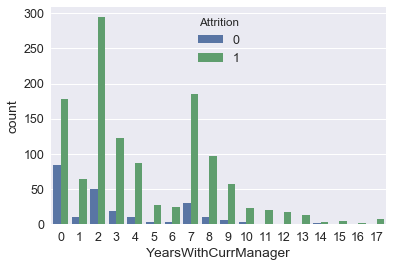

In [428]:
for i, col in enumerate(ibm_people.columns):
    plt.figure(i)
    sns.countplot(x=col, hue="Attrition", data=ibm_people)
plt.show() 

In [429]:
#ibm_people.corr()

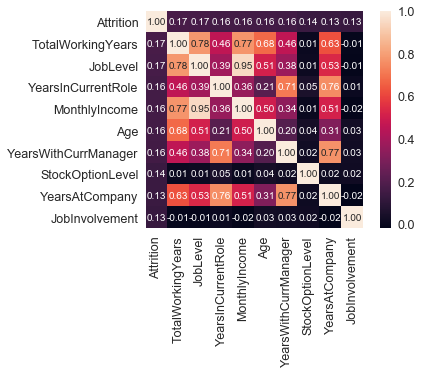

In [430]:
k = 10
cols = ibm_people.corr().nlargest(k, 'Attrition')['Attrition'].index
cm = np.corrcoef(ibm_people[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [431]:
#ibm_people = ibm_people.drop("Age", axis = 1)
#ibm_people = ibm_people.drop("JobLevel", axis = 1) #highly correlated with age
#ibm_people = ibm_people.drop("TotalWorkingYears", axis = 1)
#ibm_people = ibm_people.drop("YearsAtCompany", axis = 1)
#ibm_people = ibm_people.drop("YearsWithCurrManager", axis = 1)

To avoid multicollinearity, it is better to eliminate one of each pair of predicitve variables that have high correlation between each other. It is better to eliminate the one that has low correlation with the dependent variable- attrition. However, since later the model will perform it when estimating feature importances, the variables can be left in the model for now


In [432]:
ibm_people = ibm_people.drop("EmployeeNumber", axis = 1) # by itself this cannot be predictive of an employee's likelihood to leave

In [433]:
objects_df = ibm_people.select_dtypes(include=['object']).copy()
objects_df.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [434]:
encoded_categories = {"Gender": {"Female": 0, "Male": 1},
                "OverTime": {"No": 0, "Yes": 1,},
                "BusinessTravel": {"Non-Travel": 0, "Travel_Rarely": 1, "Travel_Frequently": 2},
                "MaritalStatus": {"Single": 0, "Married": 1, "Divorced": 2},
                "Over18":{"N": 0, "Y": 1,} }

In [435]:
objects_df.replace(encoded_categories, inplace=True)
objects_df.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,1,Sales,Life Sciences,0,Sales Executive,0,1,1
1,2,Research & Development,Life Sciences,1,Research Scientist,1,1,0
2,1,Research & Development,Other,1,Laboratory Technician,0,1,1
3,2,Research & Development,Life Sciences,0,Research Scientist,1,1,1
4,1,Research & Development,Medical,1,Laboratory Technician,1,1,0


In [436]:
col = ['Department', 'EducationField', 'JobRole']

In [437]:
d = {name: pd.get_dummies(objects_df[name], prefix=name) for name in col}
for i in range(len(col)-1):
  d[col[i]].drop(d[col[i]].columns[d[col[i]].shape[1]-1], axis=1, inplace=True)

In [438]:
d = pd.concat(d, axis=1)

In [439]:
objects_df.drop(col, axis=1, inplace=True)
df = pd.concat([objects_df, d], axis=1)
df.head() 

,BusinessTravel,Gender,MaritalStatus,Over18,OverTime,"(Department, Department_Human Resources)","(Department, Department_Research & Development)","(EducationField, EducationField_Human Resources)","(EducationField, EducationField_Life Sciences)","(EducationField, EducationField_Marketing)",...,"(EducationField, EducationField_Other)","(JobRole, JobRole_Healthcare Representative)","(JobRole, JobRole_Human Resources)","(JobRole, JobRole_Laboratory Technician)","(JobRole, JobRole_Manager)","(JobRole, JobRole_Manufacturing Director)","(JobRole, JobRole_Research Director)","(JobRole, JobRole_Research Scientist)","(JobRole, JobRole_Sales Executive)","(JobRole, JobRole_Sales Representative)"
0,1,0,0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,2,1,1,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,1,1,0,1,1,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
3,2,0,1,1,1,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,1,1,1,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [440]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 21 columns):
BusinessTravel                                      1470 non-null int64
Gender                                              1470 non-null int64
MaritalStatus                                       1470 non-null int64
Over18                                              1470 non-null int64
OverTime                                            1470 non-null int64
(Department, Department_Human Resources)            1470 non-null uint8
(Department, Department_Research & Development)     1470 non-null uint8
(EducationField, EducationField_Human Resources)    1470 non-null uint8
(EducationField, EducationField_Life Sciences)      1470 non-null uint8
(EducationField, EducationField_Marketing)          1470 non-null uint8
(EducationField, EducationField_Medical)            1470 non-null uint8
(EducationField, EducationField_Other)              1470 non-null uint8
(JobRole, JobRole_Healthcare 

In [441]:
ibm_people = ibm_people.select_dtypes(exclude =['object'])
df_final = pd.concat([ibm_people, df], axis=1)
df_final.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,"(EducationField, EducationField_Other)","(JobRole, JobRole_Healthcare Representative)","(JobRole, JobRole_Human Resources)","(JobRole, JobRole_Laboratory Technician)","(JobRole, JobRole_Manager)","(JobRole, JobRole_Manufacturing Director)","(JobRole, JobRole_Research Director)","(JobRole, JobRole_Research Scientist)","(JobRole, JobRole_Sales Executive)","(JobRole, JobRole_Sales Representative)"
0,41,0,1102,1,2,2,94,3,2,4,...,0,0,0,0,0,0,0,0,1,0
1,49,1,279,8,1,3,61,2,2,2,...,0,0,0,0,0,0,0,1,0,0
2,37,0,1373,2,2,4,92,2,1,3,...,1,0,0,1,0,0,0,0,0,0
3,33,1,1392,3,4,4,56,3,1,3,...,0,0,0,0,0,0,0,1,0,0
4,27,1,591,2,1,1,40,3,1,2,...,0,0,0,1,0,0,0,0,0,0


# Predictive Modelling

In [442]:
model_tree = DecisionTreeClassifier(random_state = 42)
model_logit = LogisticRegression(random_state = 42)

In [443]:
y = df_final.Attrition
x = df_final.drop('Attrition', axis = 1)

In [444]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 42)

In [445]:
model_tree.fit(x_train,y_train)
model_logit.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [446]:
print(model_tree.score(x_train,y_train))
print(model_logit.score(x_train,y_train))

1.0
0.887477313975


In [447]:
print(model_tree.score(x_test,y_test))
print(model_logit.score(x_test,y_test))

0.8125
0.885869565217


In [448]:
tree_pred = model_tree.predict(x_test)
logit_pred = model_logit.predict(x_test)

In [449]:
print(roc_auc_score(y_test, tree_pred))
print(roc_auc_score(y_test, logit_pred))

0.617708333333
0.651041666667


In [450]:
print(cross_val_score(model_tree, x, y, cv = 5))
print(cross_val_score(model_logit, x, y, cv = 5))

[ 0.78305085  0.78305085  0.77891156  0.75767918  0.78156997]
[ 0.88135593  0.88474576  0.87414966  0.87372014  0.90102389]


In [451]:
model_test = DecisionTreeClassifier(class_weight = "balanced", random_state= 42)

In [452]:
max_depth_values = [i for i in range(3,11, 2)]
min_sample_values = [i for i in range(50,401,50)]

In [453]:
parameters = {"max_depth": max_depth_values, "min_samples_leaf": min_sample_values}
print(parameters)

{'max_depth': [3, 5, 7, 9], 'min_samples_leaf': [50, 100, 150, 200, 250, 300, 350, 400]}


In [454]:
finder = GridSearchCV(model_test, parameters)
finder.fit(x_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 5, 7, 9], 'min_samples_leaf': [50, 100, 150, 200, 250, 300, 350, 400]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [455]:
print(finder.best_params_)

{'max_depth': 3, 'min_samples_leaf': 400}


In [456]:
model_bestDT = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 400, class_weight = "balanced", random_state = 42)

In [457]:
model_bestDT.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=400, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [458]:
model_bestDT.score(x_test,y_test)*100

68.75

In [459]:
prediction = model_bestDT.predict(x_test)
print(roc_auc_score(y_test, prediction)*100)
print(recall_score(y_test, prediction)*100)

59.0104166667
72.1875


In [460]:
importances = model_bestDT.feature_importances_

In [461]:
features = pd.DataFrame(data = importances, columns = ["importance"], index = x.columns)

In [462]:
selected = features[features.importance >0.09]

In [463]:
selected

,importance
JobLevel,1.0


In [464]:
selected_features = selected.index

In [465]:
x_train_new = x_train[selected_features]
x_train_new.head()

,JobLevel
1343,1
1121,2
1048,2
1393,2
527,2


In [466]:
model_bestDT.fit(x_train_new, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=400, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [467]:
x_test_new = x_test[selected_features]
model_bestDT.score(x_test_new, y_test)

0.6875

In [468]:
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

[[ 22  26]
 [ 89 231]]
             precision    recall  f1-score   support

          0       0.20      0.46      0.28        48
          1       0.90      0.72      0.80       320

avg / total       0.81      0.69      0.73       368



In [469]:
steps = [('scaler', StandardScaler()),
        ('logit', LogisticRegression())]


In [470]:
pipeline = Pipeline(steps)

In [471]:
logit_scaled = pipeline.fit(x_train, y_train)

In [472]:
logit_unscaled = LogisticRegression().fit(x_train, y_train)

In [473]:
print('Accuracy with Scaling: {}'.format(logit_scaled.score(x_test, y_test)))
print('Accuracy without Scaling: {}'.format(logit_unscaled.score(x_test, y_test)))

Accuracy with Scaling: 0.8940217391304348
Accuracy without Scaling: 0.8913043478260869


In [474]:
prediction = logit_scaled.predict(x_test)
print(roc_auc_score(y_test, prediction))
print(recall_score(y_test, prediction))

0.7
0.9625


In [475]:
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

[[ 21  27]
 [ 12 308]]
             precision    recall  f1-score   support

          0       0.64      0.44      0.52        48
          1       0.92      0.96      0.94       320

avg / total       0.88      0.89      0.89       368



# Conclusion

In summary, we saw that logit delivers a predictive models of higher stength. It is also more interpretable and has predict_proba method, hence, IBM might prefer using it.

An additional note: Diving deeper into descriptive statistics and understanding churn for particular segments could be even more useful than mere prediciton in this case since it would help making decisions concerning corrective actions for diminishing churn rate.